# ติดตั้ง Tool

---



In [ ]:
!pip install pythainlp
!pip install torch==1.13.1
!pip install torchtext==0.6.0

import torchtext
torchtext.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu124
    Uninstalling torch-2.5.1+cu124:
      Successfully uninstalled torch-2.5.1+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 1.3.0 requires torch>=2.0.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.20.1+cu124 requires torch==2.5.1, but you have torch 1.13.1 which is incompat

'0.6.0'

# Prepare Dataset

---


In [ ]:
! gdown --id 1xGvtr_HZLKHj4Emd4cbmndW3UBSkZfE8
! gdown --id 1Dmn0eyYwy9Z8r94Xy7eVdyWTBxG-1RIo
! gdown --id 1EX6IckcRLeKxhpJW4Cr7ItamonDdlyvN
! gdown --id 1ahlb_JE4TtrrEtkX65yLOoYEtcsxkj6m

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xGvtr_HZLKHj4Emd4cbmndW3UBSkZfE8
To: /content/TextClass.csv
100% 132k/132k [00:00<00:00, 14.5MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Dmn0eyYwy9Z8r94Xy7eVdyWTBxG-1RIo
To: /content/pos.txt
100% 761k/761k [00:00<00:00, 24.8MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.goog

In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('pos.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: pos.txt not found.")
    exit()


data = {'text': lines, 'label': [0] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('pos.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created pos.csv")


Successfully created pos.csv


In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('neu.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: neu.txt not found.")
    exit()


data = {'text': lines, 'label': [1] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('neu.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created neu.csv")


Successfully created neu.csv


In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('neg.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: neg.txt not found.")
    exit()


data = {'text': lines, 'label': [2] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('neg.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created neg.csv")


Successfully created neg.csv


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('pos.csv')
except FileNotFoundError:
    print("Error: pos.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(250)

# Save the reduced DataFrame to a new CSV file
df.to_csv('pos_reduced.csv', index=False, encoding='utf-8')
print("Successfully created pos_reduced.csv with 1000 random samples.")


Successfully created pos_reduced.csv with 1000 random samples.


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('neu.csv')
except FileNotFoundError:
    print("Error: pos.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(200)

# Save the reduced DataFrame to a new CSV file
df.to_csv('neu_reduced.csv', index=False, encoding='utf-8')
print("Successfully created neu_reduced.csv with 1000 random samples.")


Successfully created neu_reduced.csv with 1000 random samples.


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('neg.csv')
except FileNotFoundError:
    print("Error: neg.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(300)

# Save the reduced DataFrame to a new CSV file
df.to_csv('neg_reduced.csv', index=False, encoding='utf-8')
print("Successfully created neg_reduced.csv with 1000 random samples.")


Successfully created neg_reduced.csv with 1000 random samples.


In [ ]:
# prompt: รวมไฟล์ textclass, pos.csv, neu.csv

import pandas as pd

# Assuming 'textclass.csv', 'pos.csv', and 'neu.csv' are in the current directory
try:
    df_textclass = pd.read_csv('TextClass.csv')
    df_pos = pd.read_csv('pos_reduced.csv')
    df_neu = pd.read_csv('neu_reduced.csv')
    df_neg = pd.read_csv('neg_reduced.csv')

    # Concatenate the DataFrames
    combined_df = pd.concat([df_textclass, df_pos, df_neu, df_neg], ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv('TextClass.csv', index=False, encoding='utf-8')
    print("Successfully combined and saved to 'TextClass.csv'")

except FileNotFoundError:
    print("Error: One or more of the required CSV files not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Successfully combined and saved to 'TextClass.csv'


In [ ]:
import pandas as pd

# ตั้งค่า path ของไฟล์
file_path = '/content/TextClass.csv'


# โหลดไฟล์ CSV เป็น DataFrame
data = pd.read_csv(file_path)


#เปลี่ยนชื่อ labels
new_labels = {
    0: "คำทั่วไปทางการชม",
    1: "คำทั่วไป",
    2: "คำหยาบปกติ",
    3: "เหยียดรูปร่าง",
    4: "เหยียดชนชั้น",
    5: "เหยียดเพศ"
}

data['label'] = data['label'].map(new_labels)
data = data.rename(columns={'text': 'review'})
# แสดงข้อมูล
data

,review,label
0,พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ,คำทั่วไปทางการชม
1,พี่เบ๊บบี้จัดฟันน่ารักมากก,คำทั่วไปทางการชม
2,พี่สวยมากค่ะ,คำทั่วไปทางการชม
3,งามมากกลูกสาวววว💛,คำทั่วไปทางการชม
4,คนสวย🥰🥰🥰,คำทั่วไปทางการชม
...,...,...
2295,กูเขดและเน๊าะ โปรวันพุธ มะเติมของเลยต้องรอคิวเ...,คำหยาบปกติ
2296,โห้ ไม่เคยเจอฟอร์จูน crv pajero ตามหลังเลยหรา\n,คำหยาบปกติ
2297,Mazda cx-3 ใหม่ คือไม่ไหวอะ เห็นละทนไม่ได้ สวย...,คำหยาบปกติ
2298,แดกเบียร์เหล้ากูเอียนสปาย\n,คำหยาบปกติ


In [ ]:
data

,review,label
0,พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ,คำทั่วไปทางการชม
1,พี่เบ๊บบี้จัดฟันน่ารักมากก,คำทั่วไปทางการชม
2,พี่สวยมากค่ะ,คำทั่วไปทางการชม
3,งามมากกลูกสาวววว💛,คำทั่วไปทางการชม
4,คนสวย🥰🥰🥰,คำทั่วไปทางการชม
...,...,...
2295,กูเขดและเน๊าะ โปรวันพุธ มะเติมของเลยต้องรอคิวเ...,คำหยาบปกติ
2296,โห้ ไม่เคยเจอฟอร์จูน crv pajero ตามหลังเลยหรา\n,คำหยาบปกติ
2297,Mazda cx-3 ใหม่ คือไม่ไหวอะ เห็นละทนไม่ได้ สวย...,คำหยาบปกติ
2298,แดกเบียร์เหล้ากูเอียนสปาย\n,คำหยาบปกติ


In [ ]:
# # Training configurations
# SEED = 1234
# TRAIN = False
# BATCH_SIZE = 64
# N_EPOCHS = 200

# # Architecture
# EMBEDDING_DIM = 128
# HIDDEN_DIM = 512
# OUTPUT_DIM = 6
# N_LAYERS = 2
# BIDIRECTIONAL = True
# DROPOUT = 0.25

In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# # Bert model and its tokenizer
# # Text data
# from torchtext import data, datasets
# # Numerical computation
# import numpy as np
# # standard library
# import random
# import time
# # Configuration
# #from config import *

# # Set random seed for reproducible experiments
# random.seed(SEED)
# np.random.seed(SEED)
# torch.manual_seed(SEED)
# torch.backends.cudnn.deterministic = True

# import pandas as pd
# import re
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# import math
# import nltk
# from sklearn.feature_extraction.text import CountVectorizer
# from collections import defaultdict

In [ ]:
import re
import pandas as pd
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_stopwords

# โหลดข้อมูล (ต้องระบุไฟล์ CSV ที่ใช้)

def deEmojify(text):
    """ลบ Emoji ออกจากข้อความ"""
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols, Symbols for Legacy Computing, etc.
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_stop_word(text):
    """ลบ stop words ออกจากข้อความ"""
    stop_words = set(thai_stopwords())
    return ' '.join([word for word in text.split() if word not in stop_words])

def thai_clean_text(text):
    """ทำความสะอาดข้อความภาษาไทย"""
    if not isinstance(text, str) or text.strip() == "":
        return ""

    # ลบ Emoji
    text = deEmojify(text)

    # ลบอักขระพิเศษ
    text = re.sub(r'[.!@#%^&*()<>?/|}{~:]', '', text)

    # ลบตัวเลข
    text = re.sub(r'\d+', '', text)

    # ตัดคำ (Tokenization)
    words = word_tokenize(text, keep_whitespace=False)

    # ลบตัวอักษรที่ซ้ำกันเกิน 3 ตัว เช่น "มากกกก" → "มากกก"
    words = [re.sub(r'([ก-ฮ])\1{3,}', r'\1\1\1', word) for word in words]

    # ลบสระที่ซ้ำกันทิ้ง
    words = [re.sub(r'([ะ-ูเ-ไ็-๋ๆ])\1{2,}', r'\1\1', word) for word in words]

    # ลบคำที่เหลือแต่ตัวอักษรซ้ำ เช่น "นนนนนนน" → ลบทิ้ง
    words = [word for word in words if not re.fullmatch(r'([ก-ฮ])\1+', word)]

    # ลบ stop words
    # words = [word for word in words if word not in thai_stopwords()]

    return ' '.join(words).strip()

# ทำความสะอาดคอลัมน์ review
data['cleaned_review'] = data['review'].astype(str).apply(thai_clean_text)

# บันทึกผลลัพธ์
data.to_csv('cleaned_data.csv', index=False, encoding='utf-8')

# แสดงตัวอย่างข้อมูลที่ทำความสะอาดแล้ว
print(data.sample(5))


                                                 review             label  \
1072                     แลบลิ้นแล้วหน้าเป็นตัวเหี้ยเลย     เหยียดรูปร่าง   
1931  เปลี่ยนโฉมใหม่หมดเลยค่ะ พร้อมข้อเสนอพิเศษ All ...          คำทั่วไป   
4                                              คนสวย🥰🥰🥰  คำทั่วไปทางการชม   
2192            แดกเบียร์ช้างทีไรเป็นอ้วกเมาค้างทุกที\n        คำหยาบปกติ   
581              อยากได้นิสสันมาร์ชค่ะเกียร์ออโต้น่ะค่ะ          คำทั่วไป   

                                         cleaned_review  
1072                แลบลิ้น แล้ว หน้า เป็นตัว เหี้ย เลย  
1931  เปลี่ยน โฉมใหม่ หมด เลย ค่ะ พร้อม ข้อเสนอ พิเศ...  
4                                                 คนสวย  
2192       แดก เบียร์ ช้าง ทีไร เป็น อ้วก เมาค้าง ทุกที  
581       อยากได้ นิสสัน มาร์ช ค่ะ เกียร์ ออโต้ น่ะ ค่ะ  


In [ ]:
data

,review,label,cleaned_review
0,พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ,คำทั่วไปทางการชม,พี่ เบ๊บ บี้ จัด ฟัน แล้ว น่ารัก สุด ๆๆ
1,พี่เบ๊บบี้จัดฟันน่ารักมากก,คำทั่วไปทางการชม,พี่ เบ๊บ บี้ จัด ฟัน น่ารัก มา
2,พี่สวยมากค่ะ,คำทั่วไปทางการชม,พี่ สวย มาก ค่ะ
3,งามมากกลูกสาวววว💛,คำทั่วไปทางการชม,งาม มา ลูกสาว
4,คนสวย🥰🥰🥰,คำทั่วไปทางการชม,คนสวย
...,...,...,...
2295,กูเขดและเน๊าะ โปรวันพุธ มะเติมของเลยต้องรอคิวเ...,คำหยาบปกติ,กู เข ด และ เน๊าะ โปร วัน พุธ มะ เติม ของ เลย ...
2296,โห้ ไม่เคยเจอฟอร์จูน crv pajero ตามหลังเลยหรา\n,คำหยาบปกติ,โห้ ไม่ เคย เจอ ฟอร์จูน crv pajero ตามหลัง เลย...
2297,Mazda cx-3 ใหม่ คือไม่ไหวอะ เห็นละทนไม่ได้ สวย...,คำหยาบปกติ,Mazda cx- ใหม่ คือ ไม่ ไหว อะ เห็น ละ ทน ไม่ ไ...
2298,แดกเบียร์เหล้ากูเอียนสปาย\n,คำหยาบปกติ,แดก เบียร์ เหล้า กู เอียน สปาย


In [ ]:
# Training configurations
SEED = 1234
TRAIN = False
BATCH_SIZE = 32
N_EPOCHS = 200

# Architecture
EMBEDDING_DIM = 128
HIDDEN_DIM = 512
OUTPUT_DIM = 6
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# Bert model and its tokenizer
# Text data
from torchtext import data, datasets
# Numerical computation
import numpy as np
# standard library
import random
import time
# Configuration
#from config import *

# Set random seed for reproducible experiments
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
import numpy as np

import time
import random
import functools
import math

from torchtext.data import Field, Dataset, Example
import pandas as pd

class DataFrameDataset(Dataset):
    """Class for using pandas DataFrames as a datasource"""
    def __init__(self, examples, fields, filter_pred=None):
        """
        Create a dataset from a pandas dataframe of examples and Fields
        Arguments:
            examples pd.DataFrame: DataFrame of examples
            fields {str: Field}: The Fields to use in this tuple. The
                string is a field name, and the Field is the associated field.
            filter_pred (callable or None): use only exanples for which
                filter_pred(example) is true, or use all examples if None.
                Default is None
        """
        self.examples = examples.apply(SeriesExample.fromSeries, args=(fields,), axis=1).tolist()
        if filter_pred is not None:
            self.examples = filter(filter_pred, self.examples)
        self.fields = dict(fields)
        # Unpack field tuples
        for n, f in list(self.fields.items()):
            if isinstance(n, tuple):
                self.fields.update(zip(n, f))
                del self.fields[n]

class SeriesExample(Example):
    """Class to convert a pandas Series to an Example"""

    @classmethod
    def fromSeries(cls, data, fields):
        return cls.fromdict(data.to_dict(), fields)

    @classmethod
    def fromdict(cls, data, fields):
        ex = cls()

        for key, field in fields.items():
            if key not in data:
                raise ValueError("Specified key {} was not found in "
                "the input data".format(key))
            if field is not None:
                setattr(ex, key, field.preprocess(data[key]))
            else:
                setattr(ex, key, data[key])
        return ex

In [ ]:
import pandas as pd # Make sure pandas is imported

# Load your data into a DataFrame, assuming your CSV file is named 'your_data.csv'
data = pd.read_csv('cleaned_data.csv')

reviews = data['cleaned_review'].values
labels = data['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels,test_size=0.2, random_state=1234)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

val_size = int(len(test_sentences)/2)
train = list(train_sentences)[:(len(train_sentences)-val_size)]
val = list(train_sentences)[(len(train_sentences)-val_size):]
test = list(test_sentences)

print("Train set:", train[:5])
print("Validation set:", val[:5])
print("Test set:", test[:5])
print("Number of training examples:", len(train))
print("Number of validation examples:", len(val))
print("Number of test examples:", len(test))

Train set: ['ปะ ๆ', 'ของ ที่ เดอะ ร็อค เล่น ก็ สนุก ที่ แผ่นดินไหว แล้ว มี สึนามิ', 'คน ไม่ ใช่ ก็ คง ต้อง รอ ต่อไป แอด หงส์ทอง', 'สวย จริงๆ ๆๆ คะ เด ืน ไม่ เบื่อ ผู้คน น่ารัก', 'อยาก']
Validation set: ['ซี แก รม', 'อิ ตุ๊ด เอ้ย', 'อร่อย มาก ค่ะ คอนเฟิร์ม', 'เก็บ เงิน', 'ถึง']
Test set: ['มัน เป็น ญาติ กับ ไอ้ ฤทธิ์ กิน เเบล็ค ใช่ มั้ย', 'ฟิน ค่ะ', 'มา ร่วมกัน ร่วม เล่น สนุก ขับ นิสสัน กัน เถอะ', 'ชี้ อ เหล้า ให้ มัน แดก อยู่ บ่อย กู รู้ แต่ เวลา มัน แดก เอง มัน ล่อ แสงโสม เวลา มัน ให้ กู ชี้ อให่ มัน แดก black lable สาด', 'แท็กซี่ คือ จะ เปิด แอร์ ให้ หนาว ตาย เลย ใช่ปะ ฝึก ความอดทน ถุก ปะ']
Number of training examples: 1610
Number of validation examples: 230
Number of test examples: 460


In [ ]:
import pandas as pd
import os

# Assuming 'train_sentences', 'train_labels', 'val', 'test', 'test_labels' are still available from previous cells

# สร้าง DataFrame สำหรับ train, val, test
train_df = pd.DataFrame({'review': train_sentences, 'label': train_labels}) # Use train_sentences instead of train
val_df = pd.DataFrame({'review': val, 'label': train_labels[len(train_sentences)-len(val):]})  # Use len(train_sentences) to index correctly
test_df = pd.DataFrame({'review': test, 'label': test_labels})

# รวมคอลัมน์ 'review' และ 'label' เพื่อระบุข้อมูลที่ซ้ำกัน
train_df['combined'] = train_df['review'] + train_df['label'].astype(str)
val_df['combined'] = val_df['review'] + val_df['label'].astype(str)

# ลบข้อมูลที่ซ้ำกันใน train_df
train_df = train_df[~train_df['combined'].isin(val_df['combined'])]

# ลบคอลัมน์ 'combined' ออก
train_df = train_df.drop(columns=['combined'])
val_df = val_df.drop(columns=['combined'])

os.makedirs('datasets', exist_ok=True)

# บันทึก DataFrame เป็นไฟล์ CSV
train_df.to_csv('datasets/train.csv', index=False)
val_df.to_csv('datasets/val.csv', index=False)
test_df.to_csv('datasets/test.csv', index=False)

In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
# init_token_id = 1  #เริ่มต้นประโยค
# pad_token_id = 0  #pad_id ตอนเทรนจะเติมเข้าไปกรณีบางประโยคสั้นกว่าประโยคอื่น
# unk_token_id=2 # กรณีไม่พบคำศัพท์จะแทนด้วย 2 นี้
# max_input_len = 512 # ความยาวสูงสุดที่โมเดลสามารภทำนายได้

# #create vocab_dict
# vocab = []
# for i in range( train_sentences.shape[0]):
#     ws = train_sentences[i].split(" ")
#     for w in ws:
#         if w not in vocab:
#             vocab.append(w)

In [ ]:
init_token_id = 1  #เริ่มต้นประโยค
pad_token_id = 0  #pad_id ตอนเทรนจะเติมเข้าไปกรณีบางประโยคสั้นกว่าประโยคอื่น
unk_token_id=2 # กรณีไม่พบคำศัพท์จะแทนด้วย 2 นี้
max_input_len = 512 # ความยาวสูงสุดที่โมเดลสามารภทำนายได้

#create vocab_dict
vocab = []
for i in range(train_sentences.shape[0]):
    # Check if the element is a string before splitting
    if isinstance(train_sentences[i], str):
        ws = train_sentences[i].split(" ")
        for w in ws:
            if w not in vocab:
                vocab.append(w)
    else:
        # Handle non-string elements (e.g., print a warning or skip them)
        print(f"Warning: Element at index {i} is not a string: {train_sentences[i]}")

In [ ]:
vocab.sort()
start_word_id = 3
token_to_id = {val: (i+start_word_id) for i, val in enumerate(vocab)}

token_to_id.update({'init_id': init_token_id, 'pad_id':pad_token_id,'unk_id':unk_token_id})

In [ ]:
import json
vocab_json_object = json.dumps(token_to_id)
with open("token2idx.json", "w") as outfile:
    outfile.write(vocab_json_object)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [ ]:
import json
import numpy as np

import time
import random
import functools
import math

from torchtext.data import Field, Dataset, Example,LabelField
import pandas as pd # Make sure pandas is imported

# Tokensize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = sentence.split(" ")
  tokens = tokens[:max_input_len - 2]
  return tokens

def convert_tokens_to_ids(tokens):
    out_id = []
    for w in tokens:
        if w in token_to_id.keys():
            out_id.append(token_to_id[w])
        else:
            out_id.append(unk_token_id) #unk word
    if len(out_id)==0:
        return [0]
    return out_id

def load_data():
  text = Field(
    batch_first=True,
    use_vocab=False,
    tokenize=tokenize_and_crop,
    preprocessing=convert_tokens_to_ids,
    init_token=init_token_id,
    pad_token=pad_token_id,
    unk_token=unk_token_id
  )
  # Load the cleaned data CSV into a DataFrame
  cleaned_data_df = pd.read_csv('cleaned_data.csv')  # Load the preprocessed data

  label = LabelField(dtype=torch.long)

  # label = torchtext.data.LabelField(dtype=torch.float)

  fields = { 'cleaned_review' : text, 'label' : label }

  # Change 'data' to 'cleaned_data_df' to reference the DataFrame
  cleaned_data_df['cleaned_review'] = cleaned_data_df['cleaned_review'].astype(str)  # Convert to string
  examples = cleaned_data_df.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

  # Update train_ds to use the cleaned data
  train_ds = Dataset(examples, fields) # Pass examples directly instead of creating a DataFrameDataset with `cleaned_data_df`

  # Use 'cleaned_data_df' for stratification instead of 'data'
  train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=cleaned_data_df['label'])
  train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples])

  # Create datasets from the split examples
  _train_data = Dataset(train_examples, fields)
  _test_data = Dataset(test_examples, fields)
  _valid_data = Dataset(val_examples, fields)


  print(f"training examples count: {len(_train_data)}")
  print(f"test examples count: {len(_test_data)}")
  print(f"validation examples count: {len(_valid_data)}")

  label.build_vocab(_train_data)

  lab_data = {v: k for k, v in label.vocab.stoi.items()}
  with open('idx2lab.json', 'w') as f:
      json.dump(lab_data, f)



  # Use torchtext.data.BucketIterator directly
  # Change from data.BucketIterator to torchtext.data.BucketIterator
  train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
    (_train_data, _valid_data, _test_data),
    batch_size=BATCH_SIZE,
    device=device,
    sort_key = lambda x: len(x.cleaned_review),
    sort_within_batch=True
  )

  return train_iter, valid_iter, test_iter

In [ ]:
# load_data()

In [ ]:
# # Sentiment model contrain two-GRU layers for analyzing hidden representation
# # and a linear layer for classfification (the sigmoid is applied by the criterion during training).
# import torch.nn as nn

# class SentimentModel(nn.Module):
#   def __init__(
#     self,
#     vocab_size,
#     embedding_dim,
#     hidden_dim,
#     output_dim,
#     n_layers,
#     bidirectional,
#     dropout,
#     padding_id=0
#   ):

#     super(SentimentModel, self).__init__()

#     embedding_dim = embedding_dim
#     self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_id)

#     self.gru = nn.GRU(
#       embedding_dim,
#       hidden_dim,
#       num_layers=n_layers,
#       bidirectional=bidirectional,
#       batch_first=True,
#       dropout=0 if n_layers < 2 else dropout
#     )
#     self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
#     self.dropout = nn.Dropout(dropout)

#   def forward(self, text):

#     embedded = self.embedding(text)
#     _, hidden = self.gru(embedded)

#     if self.gru.bidirectional:
#       hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
#     else:
#       hidden = self.dropout(hidden[-1,:,:])

#     output = self.out(hidden)
#     return output

In [ ]:
# load_data()

In [ ]:
# Sentiment model contrain two-GRU layers for analyzing hidden representation
# and a linear layer for classfification (the sigmoid is applied by the criterion during training).
import torch.nn as nn

class SentimentModel(nn.Module):
  def __init__(
    self,
    vocab_size,
    embedding_dim,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional,
    dropout,
    padding_id=0
  ):

    super(SentimentModel, self).__init__()

    embedding_dim = embedding_dim
    self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_id)
    self.gru = nn.GRU(
         embedding_dim,
         hidden_dim,
         num_layers=n_layers,
         bidirectional=bidirectional,
         batch_first=True,
         dropout=0 if n_layers < 2 else dropout
           )


    self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
    self.dropout = nn.Dropout(dropout)

  def forward(self, text): # Define forward inside the class

    embedded = self.embedding(text)
    _, hidden = self.gru(embedded)

    # Change 'self.rnn.bidirectional' to 'self.gru.bidirectional'
    if self.gru.bidirectional:  # Correct GRU access
      hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
    else:
      hidden = self.dropout(hidden[-1,:,:])

    output = self.out(hidden)
    return output

In [ ]:
vocab_size = len(vocab) + 3

In [ ]:
model = SentimentModel(
  vocab_size,
  EMBEDDING_DIM,
  HIDDEN_DIM,
  OUTPUT_DIM,
  N_LAYERS,
  BIDIRECTIONAL,
  DROPOUT
)
print(model)
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

SentimentModel(
  (embedding): Embedding(4483, 128, padding_idx=0)
  (gru): GRU(128, 512, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (out): Linear(in_features=1024, out_features=6, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


7276934

In [ ]:
from tqdm import tqdm
# time taken for single epoch
def epoch_time(start_time, end_time):
  elapsed_time = end_time - start_time
  elapsed_mins = int(elapsed_time / 60)
  elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
  return elapsed_mins, elapsed_secs

# computes accuracy
def calculate_accuracy2(y_pred,y_true):
  y_pred = torch.round(y_pred)
  #print(y_pred.argmax(-1))
  correct = (y_true == y_pred.argmax(-1)).float()
  acc = correct.sum() / len(correct)
  return acc

# def binary_accuracy(preds, y):
#   rounded_preds = torch.round(torch.sigmoid(preds))
#   correct = (rounded_preds == y).float()
#   acc = correct.sum() / len(correct)
#   return acc

# training step
def train(model, iterator, optimizer, criterion):
  # stats
  epoch_loss = 0
  epoch_acc = 0
  # train mode
  model.train()

  for batch in tqdm(iterator):
    # train step
    optimizer.zero_grad()
    #print(batch.review)
    predictions = model(batch.cleaned_review).squeeze(1)
    loss = criterion(predictions, batch.label)
    acc = calculate_accuracy2(predictions, batch.label)
    loss.backward()
    optimizer.step()
    # stats
    epoch_loss += loss.item()
    epoch_acc += acc.item()

  return epoch_loss / len(iterator), epoch_acc / len(iterator)

# evaluates the model on given iterator (either
# train_iter, valid_iter, or test_iter)
def evaluate(model, iterator, criterion, encoder): # Add encoder as an argument

  epoch_loss = 0
  epoch_acc = 0
  # evaluation mode
  model.eval()
  y_true = []
  y_pred = []

  with torch.no_grad():
    for batch in iterator:
       #print(batch.text.shape)
       predictions = model(batch.cleaned_review).squeeze(1)
       loss = criterion(predictions, batch.label)
       acc = calculate_accuracy2(predictions, batch.label)
       epoch_loss += loss.item()
       epoch_acc += acc.item()

       y_true.extend(batch.label.cpu().numpy())  # Move to CPU and convert to NumPy
       y_pred.extend(predictions.argmax(-1).cpu().numpy())

       # No need to convert labels here, as we'll use classification_report later
       # for i in range(len(batch.label)):
       #          true_label = encoder.classes_[batch.label[i].item()]  # Use encoder.classes_ for labels
       #          pred_label = encoder.classes_[predictions[i].argmax().item()]  # Use encoder.classes_ for labels
       #          if true_label != pred_label:
       #              # Decode batch.text[i] to original text
       #              original_text = " ".join([k for k, v in token_to_id.items() if v in batch.text[i].tolist() and v not in [0, 1, 2]])
       #              # Print the results
       #              # print(f"Original Text: {original_text}")
       #              # print(f"True Label: {true_label}, Predicted Label: {pred_label}\n")

  return epoch_loss / len(iterator), epoch_acc / len(iterator), y_true, y_pred # Modified return statement to include y_true and y_pred

def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()

In [ ]:
train_labels

array([1, 1, 0, ..., 2, 0, 2])

In [ ]:
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

   # นับจำนวนข้อมูลในแต่ละคลาส
label_counts = Counter(train_labels) # แทน train_labels ด้วย labels ของข้อมูล train

   # คำนวณน้ำหนักคลาส
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

   # แปลงเป็น dictionary
class_weight_dict = dict(zip(np.unique(train_labels), class_weights))
print(class_weight_dict)

{0: 0.6552706552706553, 1: 0.7131782945736435, 2: 0.7628524046434494, 3: 1.564625850340136, 4: 1.6666666666666667, 5: 1.9166666666666667}


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data loading
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Fit the encoder on your labels
encoder.fit(df['label']) # assuming 'df' is your DataFrame containing the original labels

train_losses = []
valid_losses = []
train_accs = []
valid_accs = []

all_y_true = []
all_y_pred = []

train_iter, valid_iter, test_iter = load_data()

optimizer = optim.Adam(model.parameters(),lr=0.000005)
class_weights_tensor = torch.tensor(list(class_weight_dict.values()), dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

# criterion = nn.CrossEntropyLoss().to(device)
model = model.to(device)
# model.apply(reset_weights)

best_valid_loss = float('inf')

train_data = train

for epoch in range(N_EPOCHS):
  # start time
  start_time = time.time()
  # train for an epoch
  # train_loss, train_acc = train(model, train_iter, optimizer, criterion)
  # valid_loss, valid_acc, _, _ = evaluate(model, valid_iter, criterion)

  train_loss, train_acc = train(model, train_iter, optimizer, criterion)
  valid_loss, valid_acc, y_true, y_pred = evaluate(model, valid_iter, criterion, encoder)

  all_y_true.extend(y_true)
  all_y_pred.extend(y_pred)

  # end time
  end_time = time.time()
  # stats
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)
  # เก็บข้อมูลการสูญเสียและความแม่นยำ
  train_losses.append(train_loss)
  valid_losses.append(valid_loss)
  train_accs.append(train_acc)
  valid_accs.append(valid_acc)
  # save model if has validation loss
  # better than last one
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'sentiment_model_gru.pt')
    print(f"Best model saved at epoch {epoch} with validation loss: {valid_loss:.4f}")
  # stats
  print(f'Epoch: {epoch+1:02}/{N_EPOCHS} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
  print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')


training examples count: 1610
test examples count: 460
validation examples count: 230


100%|██████████| 51/51 [00:02<00:00, 24.89it/s]


Best model saved at epoch 0 with validation loss: 1.7830
Epoch: 01/200 | Epoch Time: 0m 2s
	Train Loss: 1.788 | Train Acc: 25.87%
	 Val. Loss: 1.783 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 53.32it/s]


Best model saved at epoch 1 with validation loss: 1.7749
Epoch: 02/200 | Epoch Time: 0m 1s
	Train Loss: 1.780 | Train Acc: 25.87%
	 Val. Loss: 1.775 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 87.03it/s]


Best model saved at epoch 2 with validation loss: 1.7669
Epoch: 03/200 | Epoch Time: 0m 0s
	Train Loss: 1.770 | Train Acc: 25.87%
	 Val. Loss: 1.767 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 83.06it/s]


Best model saved at epoch 3 with validation loss: 1.7585
Epoch: 04/200 | Epoch Time: 0m 0s
	Train Loss: 1.759 | Train Acc: 25.87%
	 Val. Loss: 1.759 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 87.17it/s]


Best model saved at epoch 4 with validation loss: 1.7504
Epoch: 05/200 | Epoch Time: 0m 0s
	Train Loss: 1.746 | Train Acc: 25.87%
	 Val. Loss: 1.750 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 64.38it/s]


Best model saved at epoch 5 with validation loss: 1.7421
Epoch: 06/200 | Epoch Time: 0m 0s
	Train Loss: 1.738 | Train Acc: 25.87%
	 Val. Loss: 1.742 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 72.74it/s]


Best model saved at epoch 6 with validation loss: 1.7340
Epoch: 07/200 | Epoch Time: 0m 0s
	Train Loss: 1.726 | Train Acc: 25.87%
	 Val. Loss: 1.734 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 86.01it/s]


Best model saved at epoch 7 with validation loss: 1.7254
Epoch: 08/200 | Epoch Time: 0m 0s
	Train Loss: 1.716 | Train Acc: 25.99%
	 Val. Loss: 1.725 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 85.90it/s]


Best model saved at epoch 8 with validation loss: 1.7165
Epoch: 09/200 | Epoch Time: 0m 0s
	Train Loss: 1.704 | Train Acc: 26.36%
	 Val. Loss: 1.717 |  Val. Acc: 29.30%


100%|██████████| 51/51 [00:00<00:00, 78.01it/s]


Best model saved at epoch 9 with validation loss: 1.7075
Epoch: 10/200 | Epoch Time: 0m 0s
	Train Loss: 1.691 | Train Acc: 26.73%
	 Val. Loss: 1.708 |  Val. Acc: 29.69%


100%|██████████| 51/51 [00:00<00:00, 78.02it/s]


Best model saved at epoch 10 with validation loss: 1.6979
Epoch: 11/200 | Epoch Time: 0m 0s
	Train Loss: 1.681 | Train Acc: 27.34%
	 Val. Loss: 1.698 |  Val. Acc: 30.47%


100%|██████████| 51/51 [00:00<00:00, 95.24it/s] 


Best model saved at epoch 11 with validation loss: 1.6880
Epoch: 12/200 | Epoch Time: 0m 0s
	Train Loss: 1.667 | Train Acc: 27.83%
	 Val. Loss: 1.688 |  Val. Acc: 30.86%


100%|██████████| 51/51 [00:00<00:00, 92.78it/s]


Best model saved at epoch 12 with validation loss: 1.6774
Epoch: 13/200 | Epoch Time: 0m 0s
	Train Loss: 1.653 | Train Acc: 28.44%
	 Val. Loss: 1.677 |  Val. Acc: 31.25%


100%|██████████| 51/51 [00:00<00:00, 94.45it/s]


Best model saved at epoch 13 with validation loss: 1.6666
Epoch: 14/200 | Epoch Time: 0m 0s
	Train Loss: 1.639 | Train Acc: 29.42%
	 Val. Loss: 1.667 |  Val. Acc: 31.25%


100%|██████████| 51/51 [00:00<00:00, 92.75it/s] 


Best model saved at epoch 14 with validation loss: 1.6551
Epoch: 15/200 | Epoch Time: 0m 0s
	Train Loss: 1.626 | Train Acc: 30.65%
	 Val. Loss: 1.655 |  Val. Acc: 31.64%


100%|██████████| 51/51 [00:00<00:00, 86.00it/s]


Best model saved at epoch 15 with validation loss: 1.6426
Epoch: 16/200 | Epoch Time: 0m 0s
	Train Loss: 1.609 | Train Acc: 31.94%
	 Val. Loss: 1.643 |  Val. Acc: 32.03%


100%|██████████| 51/51 [00:00<00:00, 85.02it/s]


Best model saved at epoch 16 with validation loss: 1.6299
Epoch: 17/200 | Epoch Time: 0m 0s
	Train Loss: 1.594 | Train Acc: 33.84%
	 Val. Loss: 1.630 |  Val. Acc: 33.20%


100%|██████████| 51/51 [00:00<00:00, 85.86it/s]


Best model saved at epoch 17 with validation loss: 1.6162
Epoch: 18/200 | Epoch Time: 0m 0s
	Train Loss: 1.575 | Train Acc: 36.47%
	 Val. Loss: 1.616 |  Val. Acc: 34.77%


100%|██████████| 51/51 [00:00<00:00, 92.99it/s]


Best model saved at epoch 18 with validation loss: 1.6015
Epoch: 19/200 | Epoch Time: 0m 0s
	Train Loss: 1.556 | Train Acc: 38.19%
	 Val. Loss: 1.602 |  Val. Acc: 35.55%


100%|██████████| 51/51 [00:00<00:00, 93.46it/s]


Best model saved at epoch 19 with validation loss: 1.5865
Epoch: 20/200 | Epoch Time: 0m 0s
	Train Loss: 1.537 | Train Acc: 41.58%
	 Val. Loss: 1.586 |  Val. Acc: 40.36%


100%|██████████| 51/51 [00:00<00:00, 92.69it/s] 


Best model saved at epoch 20 with validation loss: 1.5702
Epoch: 21/200 | Epoch Time: 0m 0s
	Train Loss: 1.519 | Train Acc: 43.90%
	 Val. Loss: 1.570 |  Val. Acc: 42.32%


100%|██████████| 51/51 [00:00<00:00, 91.31it/s]


Best model saved at epoch 21 with validation loss: 1.5531
Epoch: 22/200 | Epoch Time: 0m 0s
	Train Loss: 1.496 | Train Acc: 45.23%
	 Val. Loss: 1.553 |  Val. Acc: 45.44%


100%|██████████| 51/51 [00:00<00:00, 91.76it/s]


Best model saved at epoch 22 with validation loss: 1.5354
Epoch: 23/200 | Epoch Time: 0m 0s
	Train Loss: 1.471 | Train Acc: 47.44%
	 Val. Loss: 1.535 |  Val. Acc: 46.09%


100%|██████████| 51/51 [00:00<00:00, 92.61it/s]


Best model saved at epoch 23 with validation loss: 1.5170
Epoch: 24/200 | Epoch Time: 0m 0s
	Train Loss: 1.447 | Train Acc: 48.05%
	 Val. Loss: 1.517 |  Val. Acc: 48.96%


100%|██████████| 51/51 [00:00<00:00, 92.52it/s]


Best model saved at epoch 24 with validation loss: 1.4980
Epoch: 25/200 | Epoch Time: 0m 0s
	Train Loss: 1.422 | Train Acc: 49.87%
	 Val. Loss: 1.498 |  Val. Acc: 47.27%


100%|██████████| 51/51 [00:00<00:00, 93.60it/s]


Best model saved at epoch 25 with validation loss: 1.4781
Epoch: 26/200 | Epoch Time: 0m 0s
	Train Loss: 1.398 | Train Acc: 48.87%
	 Val. Loss: 1.478 |  Val. Acc: 44.01%


100%|██████████| 51/51 [00:00<00:00, 92.17it/s]


Best model saved at epoch 26 with validation loss: 1.4592
Epoch: 27/200 | Epoch Time: 0m 0s
	Train Loss: 1.372 | Train Acc: 49.73%
	 Val. Loss: 1.459 |  Val. Acc: 44.01%


100%|██████████| 51/51 [00:00<00:00, 94.53it/s] 


Best model saved at epoch 27 with validation loss: 1.4406
Epoch: 28/200 | Epoch Time: 0m 0s
	Train Loss: 1.344 | Train Acc: 50.96%
	 Val. Loss: 1.441 |  Val. Acc: 43.23%


100%|██████████| 51/51 [00:00<00:00, 93.21it/s] 


Best model saved at epoch 28 with validation loss: 1.4225
Epoch: 29/200 | Epoch Time: 0m 0s
	Train Loss: 1.319 | Train Acc: 51.94%
	 Val. Loss: 1.423 |  Val. Acc: 43.23%


100%|██████████| 51/51 [00:00<00:00, 92.67it/s] 


Best model saved at epoch 29 with validation loss: 1.4059
Epoch: 30/200 | Epoch Time: 0m 0s
	Train Loss: 1.296 | Train Acc: 52.37%
	 Val. Loss: 1.406 |  Val. Acc: 40.76%


100%|██████████| 51/51 [00:00<00:00, 91.23it/s]


Best model saved at epoch 30 with validation loss: 1.3912
Epoch: 31/200 | Epoch Time: 0m 0s
	Train Loss: 1.273 | Train Acc: 52.19%
	 Val. Loss: 1.391 |  Val. Acc: 41.15%


100%|██████████| 51/51 [00:00<00:00, 93.82it/s]


Best model saved at epoch 31 with validation loss: 1.3774
Epoch: 32/200 | Epoch Time: 0m 0s
	Train Loss: 1.258 | Train Acc: 53.15%
	 Val. Loss: 1.377 |  Val. Acc: 40.10%


100%|██████████| 51/51 [00:00<00:00, 93.46it/s] 


Best model saved at epoch 32 with validation loss: 1.3657
Epoch: 33/200 | Epoch Time: 0m 0s
	Train Loss: 1.234 | Train Acc: 52.84%
	 Val. Loss: 1.366 |  Val. Acc: 38.54%


100%|██████████| 51/51 [00:00<00:00, 86.49it/s]


Best model saved at epoch 33 with validation loss: 1.3555
Epoch: 34/200 | Epoch Time: 0m 0s
	Train Loss: 1.211 | Train Acc: 53.55%
	 Val. Loss: 1.355 |  Val. Acc: 36.85%


100%|██████████| 51/51 [00:00<00:00, 86.78it/s]


Best model saved at epoch 34 with validation loss: 1.3456
Epoch: 35/200 | Epoch Time: 0m 0s
	Train Loss: 1.197 | Train Acc: 52.68%
	 Val. Loss: 1.346 |  Val. Acc: 42.32%


100%|██████████| 51/51 [00:00<00:00, 86.75it/s]


Best model saved at epoch 35 with validation loss: 1.3373
Epoch: 36/200 | Epoch Time: 0m 0s
	Train Loss: 1.180 | Train Acc: 52.81%
	 Val. Loss: 1.337 |  Val. Acc: 44.66%


100%|██████████| 51/51 [00:00<00:00, 88.89it/s]


Best model saved at epoch 36 with validation loss: 1.3295
Epoch: 37/200 | Epoch Time: 0m 0s
	Train Loss: 1.165 | Train Acc: 54.03%
	 Val. Loss: 1.330 |  Val. Acc: 43.36%


100%|██████████| 51/51 [00:00<00:00, 92.44it/s]


Best model saved at epoch 37 with validation loss: 1.3227
Epoch: 38/200 | Epoch Time: 0m 0s
	Train Loss: 1.151 | Train Acc: 54.26%
	 Val. Loss: 1.323 |  Val. Acc: 44.01%


100%|██████████| 51/51 [00:00<00:00, 90.73it/s] 


Best model saved at epoch 38 with validation loss: 1.3156
Epoch: 39/200 | Epoch Time: 0m 0s
	Train Loss: 1.139 | Train Acc: 53.59%
	 Val. Loss: 1.316 |  Val. Acc: 44.40%


100%|██████████| 51/51 [00:00<00:00, 91.51it/s]


Best model saved at epoch 39 with validation loss: 1.3091
Epoch: 40/200 | Epoch Time: 0m 0s
	Train Loss: 1.128 | Train Acc: 54.08%
	 Val. Loss: 1.309 |  Val. Acc: 45.18%


100%|██████████| 51/51 [00:00<00:00, 93.08it/s]


Best model saved at epoch 40 with validation loss: 1.3021
Epoch: 41/200 | Epoch Time: 0m 0s
	Train Loss: 1.106 | Train Acc: 55.06%
	 Val. Loss: 1.302 |  Val. Acc: 46.74%


100%|██████████| 51/51 [00:00<00:00, 92.65it/s]


Best model saved at epoch 41 with validation loss: 1.2973
Epoch: 42/200 | Epoch Time: 0m 0s
	Train Loss: 1.094 | Train Acc: 55.74%
	 Val. Loss: 1.297 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 93.28it/s] 


Best model saved at epoch 42 with validation loss: 1.2910
Epoch: 43/200 | Epoch Time: 0m 0s
	Train Loss: 1.086 | Train Acc: 56.04%
	 Val. Loss: 1.291 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 91.59it/s]


Best model saved at epoch 43 with validation loss: 1.2857
Epoch: 44/200 | Epoch Time: 0m 0s
	Train Loss: 1.070 | Train Acc: 56.36%
	 Val. Loss: 1.286 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 93.01it/s]


Best model saved at epoch 44 with validation loss: 1.2809
Epoch: 45/200 | Epoch Time: 0m 0s
	Train Loss: 1.055 | Train Acc: 57.59%
	 Val. Loss: 1.281 |  Val. Acc: 46.35%


100%|██████████| 51/51 [00:00<00:00, 92.93it/s]


Best model saved at epoch 45 with validation loss: 1.2761
Epoch: 46/200 | Epoch Time: 0m 0s
	Train Loss: 1.050 | Train Acc: 57.35%
	 Val. Loss: 1.276 |  Val. Acc: 45.96%


100%|██████████| 51/51 [00:00<00:00, 89.27it/s]


Best model saved at epoch 46 with validation loss: 1.2734
Epoch: 47/200 | Epoch Time: 0m 0s
	Train Loss: 1.032 | Train Acc: 57.23%
	 Val. Loss: 1.273 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 91.52it/s]


Best model saved at epoch 47 with validation loss: 1.2671
Epoch: 48/200 | Epoch Time: 0m 0s
	Train Loss: 1.027 | Train Acc: 57.97%
	 Val. Loss: 1.267 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 92.13it/s]


Best model saved at epoch 48 with validation loss: 1.2624
Epoch: 49/200 | Epoch Time: 0m 0s
	Train Loss: 1.016 | Train Acc: 58.38%
	 Val. Loss: 1.262 |  Val. Acc: 46.74%


100%|██████████| 51/51 [00:00<00:00, 91.94it/s]


Best model saved at epoch 49 with validation loss: 1.2600
Epoch: 50/200 | Epoch Time: 0m 0s
	Train Loss: 1.005 | Train Acc: 59.31%
	 Val. Loss: 1.260 |  Val. Acc: 45.18%


100%|██████████| 51/51 [00:00<00:00, 91.15it/s]


Best model saved at epoch 50 with validation loss: 1.2553
Epoch: 51/200 | Epoch Time: 0m 0s
	Train Loss: 0.993 | Train Acc: 60.39%
	 Val. Loss: 1.255 |  Val. Acc: 46.35%


100%|██████████| 51/51 [00:00<00:00, 89.65it/s]


Best model saved at epoch 51 with validation loss: 1.2515
Epoch: 52/200 | Epoch Time: 0m 0s
	Train Loss: 0.985 | Train Acc: 60.07%
	 Val. Loss: 1.252 |  Val. Acc: 49.61%


100%|██████████| 51/51 [00:00<00:00, 85.37it/s]


Best model saved at epoch 52 with validation loss: 1.2501
Epoch: 53/200 | Epoch Time: 0m 0s
	Train Loss: 0.968 | Train Acc: 60.94%
	 Val. Loss: 1.250 |  Val. Acc: 45.57%


100%|██████████| 51/51 [00:00<00:00, 85.63it/s]


Best model saved at epoch 53 with validation loss: 1.2460
Epoch: 54/200 | Epoch Time: 0m 0s
	Train Loss: 0.961 | Train Acc: 60.77%
	 Val. Loss: 1.246 |  Val. Acc: 46.74%


100%|██████████| 51/51 [00:00<00:00, 83.64it/s]


Best model saved at epoch 54 with validation loss: 1.2424
Epoch: 55/200 | Epoch Time: 0m 0s
	Train Loss: 0.951 | Train Acc: 61.18%
	 Val. Loss: 1.242 |  Val. Acc: 43.49%


100%|██████████| 51/51 [00:00<00:00, 91.19it/s]


Best model saved at epoch 55 with validation loss: 1.2397
Epoch: 56/200 | Epoch Time: 0m 0s
	Train Loss: 0.947 | Train Acc: 60.72%
	 Val. Loss: 1.240 |  Val. Acc: 43.49%


100%|██████████| 51/51 [00:00<00:00, 93.60it/s] 


Epoch: 57/200 | Epoch Time: 0m 0s
	Train Loss: 0.931 | Train Acc: 62.28%
	 Val. Loss: 1.240 |  Val. Acc: 45.18%


100%|██████████| 51/51 [00:00<00:00, 92.25it/s]


Best model saved at epoch 57 with validation loss: 1.2370
Epoch: 58/200 | Epoch Time: 0m 0s
	Train Loss: 0.926 | Train Acc: 62.46%
	 Val. Loss: 1.237 |  Val. Acc: 45.18%


100%|██████████| 51/51 [00:00<00:00, 92.66it/s]


Best model saved at epoch 58 with validation loss: 1.2363
Epoch: 59/200 | Epoch Time: 0m 0s
	Train Loss: 0.912 | Train Acc: 63.21%
	 Val. Loss: 1.236 |  Val. Acc: 45.57%


100%|██████████| 51/51 [00:00<00:00, 91.69it/s] 


Epoch: 60/200 | Epoch Time: 0m 0s
	Train Loss: 0.907 | Train Acc: 62.93%
	 Val. Loss: 1.237 |  Val. Acc: 46.35%


100%|██████████| 51/51 [00:00<00:00, 92.27it/s]


Best model saved at epoch 60 with validation loss: 1.2350
Epoch: 61/200 | Epoch Time: 0m 0s
	Train Loss: 0.901 | Train Acc: 63.14%
	 Val. Loss: 1.235 |  Val. Acc: 46.74%


100%|██████████| 51/51 [00:00<00:00, 91.79it/s]


Best model saved at epoch 61 with validation loss: 1.2345
Epoch: 62/200 | Epoch Time: 0m 0s
	Train Loss: 0.893 | Train Acc: 63.74%
	 Val. Loss: 1.235 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 91.85it/s]


Best model saved at epoch 62 with validation loss: 1.2344
Epoch: 63/200 | Epoch Time: 0m 0s
	Train Loss: 0.882 | Train Acc: 63.17%
	 Val. Loss: 1.234 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 92.00it/s]


Best model saved at epoch 63 with validation loss: 1.2343
Epoch: 64/200 | Epoch Time: 0m 0s
	Train Loss: 0.880 | Train Acc: 63.62%
	 Val. Loss: 1.234 |  Val. Acc: 47.14%


100%|██████████| 51/51 [00:00<00:00, 91.99it/s]


Best model saved at epoch 64 with validation loss: 1.2306
Epoch: 65/200 | Epoch Time: 0m 0s
	Train Loss: 0.872 | Train Acc: 62.99%
	 Val. Loss: 1.231 |  Val. Acc: 47.14%


100%|██████████| 51/51 [00:00<00:00, 92.30it/s]


Epoch: 66/200 | Epoch Time: 0m 0s
	Train Loss: 0.859 | Train Acc: 64.83%
	 Val. Loss: 1.234 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 90.95it/s]


Epoch: 67/200 | Epoch Time: 0m 0s
	Train Loss: 0.851 | Train Acc: 65.15%
	 Val. Loss: 1.234 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 91.89it/s]


Epoch: 68/200 | Epoch Time: 0m 0s
	Train Loss: 0.848 | Train Acc: 65.02%
	 Val. Loss: 1.232 |  Val. Acc: 47.14%


100%|██████████| 51/51 [00:00<00:00, 90.85it/s]


Epoch: 69/200 | Epoch Time: 0m 0s
	Train Loss: 0.839 | Train Acc: 63.75%
	 Val. Loss: 1.235 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 89.64it/s]


Epoch: 70/200 | Epoch Time: 0m 0s
	Train Loss: 0.831 | Train Acc: 66.43%
	 Val. Loss: 1.235 |  Val. Acc: 50.78%


100%|██████████| 51/51 [00:00<00:00, 89.67it/s]


Epoch: 71/200 | Epoch Time: 0m 0s
	Train Loss: 0.823 | Train Acc: 65.21%
	 Val. Loss: 1.234 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 84.87it/s]


Epoch: 72/200 | Epoch Time: 0m 0s
	Train Loss: 0.815 | Train Acc: 65.01%
	 Val. Loss: 1.238 |  Val. Acc: 51.17%


100%|██████████| 51/51 [00:00<00:00, 87.94it/s] 


Epoch: 73/200 | Epoch Time: 0m 0s
	Train Loss: 0.814 | Train Acc: 64.66%
	 Val. Loss: 1.239 |  Val. Acc: 51.17%


100%|██████████| 51/51 [00:00<00:00, 83.96it/s]


Epoch: 74/200 | Epoch Time: 0m 0s
	Train Loss: 0.806 | Train Acc: 65.50%
	 Val. Loss: 1.236 |  Val. Acc: 51.95%


100%|██████████| 51/51 [00:00<00:00, 87.80it/s]


Epoch: 75/200 | Epoch Time: 0m 0s
	Train Loss: 0.795 | Train Acc: 66.63%
	 Val. Loss: 1.238 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 91.85it/s]


Epoch: 76/200 | Epoch Time: 0m 0s
	Train Loss: 0.791 | Train Acc: 66.58%
	 Val. Loss: 1.241 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 90.05it/s] 


Epoch: 77/200 | Epoch Time: 0m 0s
	Train Loss: 0.790 | Train Acc: 66.26%
	 Val. Loss: 1.243 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 92.48it/s]


Epoch: 78/200 | Epoch Time: 0m 0s
	Train Loss: 0.779 | Train Acc: 67.12%
	 Val. Loss: 1.244 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 90.74it/s] 


Epoch: 79/200 | Epoch Time: 0m 0s
	Train Loss: 0.766 | Train Acc: 67.98%
	 Val. Loss: 1.247 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 89.34it/s]


Epoch: 80/200 | Epoch Time: 0m 0s
	Train Loss: 0.767 | Train Acc: 67.08%
	 Val. Loss: 1.244 |  Val. Acc: 51.95%


100%|██████████| 51/51 [00:00<00:00, 91.04it/s]


Epoch: 81/200 | Epoch Time: 0m 0s
	Train Loss: 0.758 | Train Acc: 67.88%
	 Val. Loss: 1.248 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 91.04it/s]


Epoch: 82/200 | Epoch Time: 0m 0s
	Train Loss: 0.754 | Train Acc: 68.68%
	 Val. Loss: 1.249 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 91.81it/s]


Epoch: 83/200 | Epoch Time: 0m 0s
	Train Loss: 0.748 | Train Acc: 68.31%
	 Val. Loss: 1.250 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 90.30it/s]


Epoch: 84/200 | Epoch Time: 0m 0s
	Train Loss: 0.741 | Train Acc: 69.41%
	 Val. Loss: 1.251 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 91.35it/s]


Epoch: 85/200 | Epoch Time: 0m 0s
	Train Loss: 0.733 | Train Acc: 69.11%
	 Val. Loss: 1.256 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 90.61it/s]


Epoch: 86/200 | Epoch Time: 0m 0s
	Train Loss: 0.732 | Train Acc: 69.90%
	 Val. Loss: 1.257 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 90.64it/s]


Epoch: 87/200 | Epoch Time: 0m 0s
	Train Loss: 0.727 | Train Acc: 69.66%
	 Val. Loss: 1.260 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 92.00it/s]


Epoch: 88/200 | Epoch Time: 0m 0s
	Train Loss: 0.717 | Train Acc: 69.60%
	 Val. Loss: 1.263 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 91.24it/s]


Epoch: 89/200 | Epoch Time: 0m 0s
	Train Loss: 0.711 | Train Acc: 70.58%
	 Val. Loss: 1.262 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 90.94it/s]


Epoch: 90/200 | Epoch Time: 0m 0s
	Train Loss: 0.706 | Train Acc: 70.64%
	 Val. Loss: 1.264 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 89.95it/s]


Epoch: 91/200 | Epoch Time: 0m 0s
	Train Loss: 0.697 | Train Acc: 70.33%
	 Val. Loss: 1.272 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 83.88it/s]


Epoch: 92/200 | Epoch Time: 0m 0s
	Train Loss: 0.693 | Train Acc: 71.07%
	 Val. Loss: 1.275 |  Val. Acc: 49.48%


100%|██████████| 51/51 [00:00<00:00, 87.69it/s]


Epoch: 93/200 | Epoch Time: 0m 0s
	Train Loss: 0.690 | Train Acc: 71.00%
	 Val. Loss: 1.276 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 85.01it/s]


Epoch: 94/200 | Epoch Time: 0m 0s
	Train Loss: 0.680 | Train Acc: 70.58%
	 Val. Loss: 1.278 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 84.53it/s]


Epoch: 95/200 | Epoch Time: 0m 0s
	Train Loss: 0.674 | Train Acc: 71.68%
	 Val. Loss: 1.288 |  Val. Acc: 50.65%


100%|██████████| 51/51 [00:00<00:00, 90.19it/s]


Epoch: 96/200 | Epoch Time: 0m 0s
	Train Loss: 0.667 | Train Acc: 72.23%
	 Val. Loss: 1.285 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 90.26it/s] 


Epoch: 97/200 | Epoch Time: 0m 0s
	Train Loss: 0.660 | Train Acc: 71.86%
	 Val. Loss: 1.296 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 91.20it/s] 


Epoch: 98/200 | Epoch Time: 0m 0s
	Train Loss: 0.663 | Train Acc: 72.48%
	 Val. Loss: 1.296 |  Val. Acc: 51.82%


100%|██████████| 51/51 [00:00<00:00, 88.47it/s]


Epoch: 99/200 | Epoch Time: 0m 0s
	Train Loss: 0.652 | Train Acc: 72.97%
	 Val. Loss: 1.295 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 90.07it/s]


Epoch: 100/200 | Epoch Time: 0m 0s
	Train Loss: 0.646 | Train Acc: 71.99%
	 Val. Loss: 1.296 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 90.80it/s]


Epoch: 101/200 | Epoch Time: 0m 0s
	Train Loss: 0.642 | Train Acc: 72.41%
	 Val. Loss: 1.306 |  Val. Acc: 55.08%


100%|██████████| 51/51 [00:00<00:00, 90.08it/s] 


Epoch: 102/200 | Epoch Time: 0m 0s
	Train Loss: 0.641 | Train Acc: 73.21%
	 Val. Loss: 1.312 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 90.09it/s]


Epoch: 103/200 | Epoch Time: 0m 0s
	Train Loss: 0.631 | Train Acc: 73.57%
	 Val. Loss: 1.309 |  Val. Acc: 55.86%


100%|██████████| 51/51 [00:00<00:00, 89.55it/s]


Epoch: 104/200 | Epoch Time: 0m 0s
	Train Loss: 0.626 | Train Acc: 73.33%
	 Val. Loss: 1.314 |  Val. Acc: 55.86%


100%|██████████| 51/51 [00:00<00:00, 89.68it/s]


Epoch: 105/200 | Epoch Time: 0m 0s
	Train Loss: 0.619 | Train Acc: 74.38%
	 Val. Loss: 1.324 |  Val. Acc: 55.47%


100%|██████████| 51/51 [00:00<00:00, 89.87it/s] 


Epoch: 106/200 | Epoch Time: 0m 0s
	Train Loss: 0.616 | Train Acc: 74.31%
	 Val. Loss: 1.326 |  Val. Acc: 53.91%


100%|██████████| 51/51 [00:00<00:00, 90.13it/s]


Epoch: 107/200 | Epoch Time: 0m 0s
	Train Loss: 0.611 | Train Acc: 74.38%
	 Val. Loss: 1.326 |  Val. Acc: 54.69%


100%|██████████| 51/51 [00:00<00:00, 90.53it/s] 


Epoch: 108/200 | Epoch Time: 0m 0s
	Train Loss: 0.612 | Train Acc: 73.03%
	 Val. Loss: 1.330 |  Val. Acc: 54.69%


100%|██████████| 51/51 [00:00<00:00, 88.64it/s]


Epoch: 109/200 | Epoch Time: 0m 0s
	Train Loss: 0.600 | Train Acc: 75.16%
	 Val. Loss: 1.335 |  Val. Acc: 54.69%


100%|██████████| 51/51 [00:00<00:00, 90.95it/s]


Epoch: 110/200 | Epoch Time: 0m 0s
	Train Loss: 0.597 | Train Acc: 74.62%
	 Val. Loss: 1.339 |  Val. Acc: 54.69%


100%|██████████| 51/51 [00:00<00:00, 89.49it/s]


Epoch: 111/200 | Epoch Time: 0m 0s
	Train Loss: 0.590 | Train Acc: 74.44%
	 Val. Loss: 1.345 |  Val. Acc: 54.69%


100%|██████████| 51/51 [00:00<00:00, 84.68it/s]


Epoch: 112/200 | Epoch Time: 0m 0s
	Train Loss: 0.585 | Train Acc: 75.11%
	 Val. Loss: 1.359 |  Val. Acc: 54.69%


100%|██████████| 51/51 [00:00<00:00, 86.97it/s]


Epoch: 113/200 | Epoch Time: 0m 0s
	Train Loss: 0.586 | Train Acc: 74.67%
	 Val. Loss: 1.358 |  Val. Acc: 53.91%


100%|██████████| 51/51 [00:00<00:00, 85.71it/s]


Epoch: 114/200 | Epoch Time: 0m 0s
	Train Loss: 0.575 | Train Acc: 75.85%
	 Val. Loss: 1.355 |  Val. Acc: 51.95%


100%|██████████| 51/51 [00:00<00:00, 84.02it/s]


Epoch: 115/200 | Epoch Time: 0m 0s
	Train Loss: 0.575 | Train Acc: 74.67%
	 Val. Loss: 1.364 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 89.55it/s]


Epoch: 116/200 | Epoch Time: 0m 0s
	Train Loss: 0.569 | Train Acc: 76.21%
	 Val. Loss: 1.381 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 90.42it/s]


Epoch: 117/200 | Epoch Time: 0m 0s
	Train Loss: 0.565 | Train Acc: 76.40%
	 Val. Loss: 1.380 |  Val. Acc: 53.52%


100%|██████████| 51/51 [00:00<00:00, 89.62it/s]


Epoch: 118/200 | Epoch Time: 0m 0s
	Train Loss: 0.558 | Train Acc: 76.83%
	 Val. Loss: 1.385 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 89.63it/s]


Epoch: 119/200 | Epoch Time: 0m 0s
	Train Loss: 0.553 | Train Acc: 76.27%
	 Val. Loss: 1.398 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 90.16it/s]


Epoch: 120/200 | Epoch Time: 0m 0s
	Train Loss: 0.554 | Train Acc: 76.64%
	 Val. Loss: 1.400 |  Val. Acc: 51.56%


100%|██████████| 51/51 [00:00<00:00, 90.80it/s] 


Epoch: 121/200 | Epoch Time: 0m 0s
	Train Loss: 0.545 | Train Acc: 76.09%
	 Val. Loss: 1.423 |  Val. Acc: 51.95%


100%|██████████| 51/51 [00:00<00:00, 89.80it/s]


Epoch: 122/200 | Epoch Time: 0m 0s
	Train Loss: 0.538 | Train Acc: 76.46%
	 Val. Loss: 1.413 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 89.63it/s]


Epoch: 123/200 | Epoch Time: 0m 0s
	Train Loss: 0.533 | Train Acc: 76.95%
	 Val. Loss: 1.425 |  Val. Acc: 53.91%


100%|██████████| 51/51 [00:00<00:00, 89.14it/s]


Epoch: 124/200 | Epoch Time: 0m 0s
	Train Loss: 0.532 | Train Acc: 76.89%
	 Val. Loss: 1.434 |  Val. Acc: 53.91%


100%|██████████| 51/51 [00:00<00:00, 90.44it/s]


Epoch: 125/200 | Epoch Time: 0m 0s
	Train Loss: 0.523 | Train Acc: 77.07%
	 Val. Loss: 1.423 |  Val. Acc: 53.12%


100%|██████████| 51/51 [00:00<00:00, 89.30it/s]


Epoch: 126/200 | Epoch Time: 0m 0s
	Train Loss: 0.519 | Train Acc: 76.90%
	 Val. Loss: 1.433 |  Val. Acc: 53.52%


100%|██████████| 51/51 [00:00<00:00, 90.36it/s] 


Epoch: 127/200 | Epoch Time: 0m 0s
	Train Loss: 0.520 | Train Acc: 77.75%
	 Val. Loss: 1.439 |  Val. Acc: 53.91%


100%|██████████| 51/51 [00:00<00:00, 88.97it/s]


Epoch: 128/200 | Epoch Time: 0m 0s
	Train Loss: 0.520 | Train Acc: 76.58%
	 Val. Loss: 1.453 |  Val. Acc: 53.52%


100%|██████████| 51/51 [00:00<00:00, 88.69it/s] 


Epoch: 129/200 | Epoch Time: 0m 0s
	Train Loss: 0.508 | Train Acc: 77.88%
	 Val. Loss: 1.453 |  Val. Acc: 53.91%


100%|██████████| 51/51 [00:00<00:00, 89.93it/s]


Epoch: 130/200 | Epoch Time: 0m 0s
	Train Loss: 0.512 | Train Acc: 77.70%
	 Val. Loss: 1.456 |  Val. Acc: 53.91%


100%|██████████| 51/51 [00:00<00:00, 87.38it/s]


Epoch: 131/200 | Epoch Time: 0m 0s
	Train Loss: 0.508 | Train Acc: 77.39%
	 Val. Loss: 1.455 |  Val. Acc: 54.30%


100%|██████████| 51/51 [00:00<00:00, 85.07it/s]


Epoch: 132/200 | Epoch Time: 0m 0s
	Train Loss: 0.497 | Train Acc: 77.39%
	 Val. Loss: 1.468 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 87.75it/s]


Epoch: 133/200 | Epoch Time: 0m 0s
	Train Loss: 0.495 | Train Acc: 77.94%
	 Val. Loss: 1.473 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 85.48it/s]


Epoch: 134/200 | Epoch Time: 0m 0s
	Train Loss: 0.490 | Train Acc: 77.56%
	 Val. Loss: 1.481 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 83.49it/s]


Epoch: 135/200 | Epoch Time: 0m 0s
	Train Loss: 0.481 | Train Acc: 78.74%
	 Val. Loss: 1.497 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 89.06it/s]


Epoch: 136/200 | Epoch Time: 0m 0s
	Train Loss: 0.480 | Train Acc: 78.98%
	 Val. Loss: 1.502 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 89.82it/s]


Epoch: 137/200 | Epoch Time: 0m 0s
	Train Loss: 0.476 | Train Acc: 77.93%
	 Val. Loss: 1.494 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 55.98it/s]


Epoch: 138/200 | Epoch Time: 0m 0s
	Train Loss: 0.473 | Train Acc: 78.86%
	 Val. Loss: 1.490 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 64.76it/s]


Epoch: 139/200 | Epoch Time: 0m 0s
	Train Loss: 0.468 | Train Acc: 79.47%
	 Val. Loss: 1.520 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 74.98it/s]


Epoch: 140/200 | Epoch Time: 0m 0s
	Train Loss: 0.466 | Train Acc: 79.95%
	 Val. Loss: 1.521 |  Val. Acc: 51.43%


100%|██████████| 51/51 [00:00<00:00, 61.71it/s]


Epoch: 141/200 | Epoch Time: 0m 0s
	Train Loss: 0.461 | Train Acc: 79.28%
	 Val. Loss: 1.519 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 89.04it/s]


Epoch: 142/200 | Epoch Time: 0m 0s
	Train Loss: 0.458 | Train Acc: 79.90%
	 Val. Loss: 1.527 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 88.57it/s]


Epoch: 143/200 | Epoch Time: 0m 0s
	Train Loss: 0.450 | Train Acc: 79.53%
	 Val. Loss: 1.533 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 88.47it/s]


Epoch: 144/200 | Epoch Time: 0m 0s
	Train Loss: 0.446 | Train Acc: 81.00%
	 Val. Loss: 1.541 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 88.06it/s]


Epoch: 145/200 | Epoch Time: 0m 0s
	Train Loss: 0.440 | Train Acc: 79.78%
	 Val. Loss: 1.540 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 86.73it/s]


Epoch: 146/200 | Epoch Time: 0m 0s
	Train Loss: 0.440 | Train Acc: 81.43%
	 Val. Loss: 1.545 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 88.07it/s]


Epoch: 147/200 | Epoch Time: 0m 0s
	Train Loss: 0.444 | Train Acc: 79.77%
	 Val. Loss: 1.532 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 89.23it/s]


Epoch: 148/200 | Epoch Time: 0m 0s
	Train Loss: 0.434 | Train Acc: 81.13%
	 Val. Loss: 1.558 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 88.82it/s]


Epoch: 149/200 | Epoch Time: 0m 0s
	Train Loss: 0.427 | Train Acc: 81.56%
	 Val. Loss: 1.588 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 84.60it/s]


Epoch: 150/200 | Epoch Time: 0m 0s
	Train Loss: 0.430 | Train Acc: 80.94%
	 Val. Loss: 1.568 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 85.17it/s]


Epoch: 151/200 | Epoch Time: 0m 0s
	Train Loss: 0.425 | Train Acc: 81.74%
	 Val. Loss: 1.571 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 83.67it/s]


Epoch: 152/200 | Epoch Time: 0m 0s
	Train Loss: 0.415 | Train Acc: 81.56%
	 Val. Loss: 1.568 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 83.25it/s]


Epoch: 153/200 | Epoch Time: 0m 0s
	Train Loss: 0.418 | Train Acc: 82.60%
	 Val. Loss: 1.579 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 88.86it/s]


Epoch: 154/200 | Epoch Time: 0m 0s
	Train Loss: 0.412 | Train Acc: 82.17%
	 Val. Loss: 1.591 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 89.00it/s]


Epoch: 155/200 | Epoch Time: 0m 0s
	Train Loss: 0.409 | Train Acc: 82.66%
	 Val. Loss: 1.597 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 88.81it/s]


Epoch: 156/200 | Epoch Time: 0m 0s
	Train Loss: 0.409 | Train Acc: 81.80%
	 Val. Loss: 1.600 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 87.50it/s]


Epoch: 157/200 | Epoch Time: 0m 0s
	Train Loss: 0.397 | Train Acc: 82.29%
	 Val. Loss: 1.606 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 87.74it/s]


Epoch: 158/200 | Epoch Time: 0m 0s
	Train Loss: 0.396 | Train Acc: 83.09%
	 Val. Loss: 1.634 |  Val. Acc: 51.82%


100%|██████████| 51/51 [00:00<00:00, 87.90it/s]


Epoch: 159/200 | Epoch Time: 0m 0s
	Train Loss: 0.391 | Train Acc: 82.78%
	 Val. Loss: 1.633 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 87.57it/s]


Epoch: 160/200 | Epoch Time: 0m 0s
	Train Loss: 0.389 | Train Acc: 83.64%
	 Val. Loss: 1.633 |  Val. Acc: 51.82%


100%|██████████| 51/51 [00:00<00:00, 87.80it/s]


Epoch: 161/200 | Epoch Time: 0m 0s
	Train Loss: 0.388 | Train Acc: 83.76%
	 Val. Loss: 1.621 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 88.08it/s]


Epoch: 162/200 | Epoch Time: 0m 0s
	Train Loss: 0.384 | Train Acc: 83.03%
	 Val. Loss: 1.636 |  Val. Acc: 51.43%


100%|██████████| 51/51 [00:00<00:00, 88.26it/s] 


Epoch: 163/200 | Epoch Time: 0m 0s
	Train Loss: 0.380 | Train Acc: 82.35%
	 Val. Loss: 1.644 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 87.69it/s]


Epoch: 164/200 | Epoch Time: 0m 0s
	Train Loss: 0.376 | Train Acc: 83.39%
	 Val. Loss: 1.655 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 87.62it/s]


Epoch: 165/200 | Epoch Time: 0m 0s
	Train Loss: 0.369 | Train Acc: 84.44%
	 Val. Loss: 1.657 |  Val. Acc: 51.82%


100%|██████████| 51/51 [00:00<00:00, 87.56it/s]


Epoch: 166/200 | Epoch Time: 0m 0s
	Train Loss: 0.374 | Train Acc: 83.58%
	 Val. Loss: 1.645 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 87.67it/s]


Epoch: 167/200 | Epoch Time: 0m 0s
	Train Loss: 0.367 | Train Acc: 83.70%
	 Val. Loss: 1.654 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 87.88it/s]


Epoch: 168/200 | Epoch Time: 0m 0s
	Train Loss: 0.364 | Train Acc: 84.19%
	 Val. Loss: 1.669 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 85.78it/s]


Epoch: 169/200 | Epoch Time: 0m 0s
	Train Loss: 0.363 | Train Acc: 84.56%
	 Val. Loss: 1.686 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 83.39it/s]


Epoch: 170/200 | Epoch Time: 0m 0s
	Train Loss: 0.357 | Train Acc: 84.74%
	 Val. Loss: 1.683 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 82.44it/s]


Epoch: 171/200 | Epoch Time: 0m 0s
	Train Loss: 0.350 | Train Acc: 84.93%
	 Val. Loss: 1.690 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 80.76it/s]


Epoch: 172/200 | Epoch Time: 0m 0s
	Train Loss: 0.347 | Train Acc: 84.87%
	 Val. Loss: 1.692 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 84.47it/s]


Epoch: 173/200 | Epoch Time: 0m 0s
	Train Loss: 0.348 | Train Acc: 85.42%
	 Val. Loss: 1.686 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 86.63it/s]


Epoch: 174/200 | Epoch Time: 0m 0s
	Train Loss: 0.343 | Train Acc: 84.99%
	 Val. Loss: 1.718 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 87.00it/s]


Epoch: 175/200 | Epoch Time: 0m 0s
	Train Loss: 0.343 | Train Acc: 85.17%
	 Val. Loss: 1.722 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 87.59it/s]


Epoch: 176/200 | Epoch Time: 0m 0s
	Train Loss: 0.336 | Train Acc: 85.42%
	 Val. Loss: 1.723 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 87.97it/s]


Epoch: 177/200 | Epoch Time: 0m 0s
	Train Loss: 0.336 | Train Acc: 85.29%
	 Val. Loss: 1.736 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 88.78it/s]


Epoch: 178/200 | Epoch Time: 0m 0s
	Train Loss: 0.335 | Train Acc: 85.48%
	 Val. Loss: 1.743 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 88.63it/s]


Epoch: 179/200 | Epoch Time: 0m 0s
	Train Loss: 0.329 | Train Acc: 86.58%
	 Val. Loss: 1.757 |  Val. Acc: 51.43%


100%|██████████| 51/51 [00:00<00:00, 87.94it/s]


Epoch: 180/200 | Epoch Time: 0m 0s
	Train Loss: 0.328 | Train Acc: 86.27%
	 Val. Loss: 1.698 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 86.87it/s]


Epoch: 181/200 | Epoch Time: 0m 0s
	Train Loss: 0.317 | Train Acc: 86.52%
	 Val. Loss: 1.773 |  Val. Acc: 51.82%


100%|██████████| 51/51 [00:00<00:00, 88.13it/s]


Epoch: 182/200 | Epoch Time: 0m 0s
	Train Loss: 0.320 | Train Acc: 87.07%
	 Val. Loss: 1.756 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 88.71it/s]


Epoch: 183/200 | Epoch Time: 0m 0s
	Train Loss: 0.318 | Train Acc: 86.83%
	 Val. Loss: 1.759 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 86.91it/s]


Epoch: 184/200 | Epoch Time: 0m 0s
	Train Loss: 0.312 | Train Acc: 86.64%
	 Val. Loss: 1.752 |  Val. Acc: 52.60%


100%|██████████| 51/51 [00:00<00:00, 89.26it/s]


Epoch: 185/200 | Epoch Time: 0m 0s
	Train Loss: 0.312 | Train Acc: 87.13%
	 Val. Loss: 1.779 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 87.35it/s]


Epoch: 186/200 | Epoch Time: 0m 0s
	Train Loss: 0.309 | Train Acc: 87.07%
	 Val. Loss: 1.721 |  Val. Acc: 54.95%


100%|██████████| 51/51 [00:00<00:00, 84.13it/s]


Epoch: 187/200 | Epoch Time: 0m 0s
	Train Loss: 0.308 | Train Acc: 87.50%
	 Val. Loss: 1.785 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 59.73it/s]


Epoch: 188/200 | Epoch Time: 0m 0s
	Train Loss: 0.301 | Train Acc: 87.81%
	 Val. Loss: 1.798 |  Val. Acc: 52.21%


100%|██████████| 51/51 [00:00<00:00, 84.42it/s]


Epoch: 189/200 | Epoch Time: 0m 0s
	Train Loss: 0.300 | Train Acc: 86.70%
	 Val. Loss: 1.773 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 84.66it/s]


Epoch: 190/200 | Epoch Time: 0m 0s
	Train Loss: 0.297 | Train Acc: 87.68%
	 Val. Loss: 1.797 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 82.19it/s]


Epoch: 191/200 | Epoch Time: 0m 0s
	Train Loss: 0.295 | Train Acc: 87.62%
	 Val. Loss: 1.812 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 86.40it/s]


Epoch: 192/200 | Epoch Time: 0m 0s
	Train Loss: 0.289 | Train Acc: 88.36%
	 Val. Loss: 1.819 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 88.63it/s]


Epoch: 193/200 | Epoch Time: 0m 0s
	Train Loss: 0.289 | Train Acc: 88.30%
	 Val. Loss: 1.830 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 89.29it/s]


Epoch: 194/200 | Epoch Time: 0m 0s
	Train Loss: 0.290 | Train Acc: 87.56%
	 Val. Loss: 1.863 |  Val. Acc: 52.99%


100%|██████████| 51/51 [00:00<00:00, 88.68it/s]


Epoch: 195/200 | Epoch Time: 0m 0s
	Train Loss: 0.284 | Train Acc: 88.11%
	 Val. Loss: 1.826 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 88.97it/s]


Epoch: 196/200 | Epoch Time: 0m 0s
	Train Loss: 0.283 | Train Acc: 87.93%
	 Val. Loss: 1.836 |  Val. Acc: 53.78%


100%|██████████| 51/51 [00:00<00:00, 87.25it/s] 


Epoch: 197/200 | Epoch Time: 0m 0s
	Train Loss: 0.277 | Train Acc: 88.66%
	 Val. Loss: 1.863 |  Val. Acc: 53.78%


100%|██████████| 51/51 [00:00<00:00, 89.18it/s]


Epoch: 198/200 | Epoch Time: 0m 0s
	Train Loss: 0.278 | Train Acc: 88.60%
	 Val. Loss: 1.857 |  Val. Acc: 53.39%


100%|██████████| 51/51 [00:00<00:00, 88.87it/s] 


Epoch: 199/200 | Epoch Time: 0m 0s
	Train Loss: 0.270 | Train Acc: 89.34%
	 Val. Loss: 1.854 |  Val. Acc: 54.56%


100%|██████████| 51/51 [00:00<00:00, 88.41it/s]


Epoch: 200/200 | Epoch Time: 0m 0s
	Train Loss: 0.269 | Train Acc: 88.97%
	 Val. Loss: 1.866 |  Val. Acc: 54.17%


In [ ]:
train_labels

array([1, 1, 0, ..., 2, 0, 2])

In [ ]:
model.load_state_dict(torch.load('sentiment_model_gru.pt', map_location=device))
model.eval() #ต้องเรียก .eval() เมื่อต้องการทดสอบโมเดลเพื่อไม่ให้เอาข้อมูลเราทดสอบไปเทรน

SentimentModel(
  (embedding): Embedding(4483, 128, padding_idx=0)
  (gru): GRU(128, 512, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (out): Linear(in_features=1024, out_features=6, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [ ]:
for name, layer in model.named_modules(): # วนลูปผ่าน layer ทั้งหมดในโมเดล
    if isinstance(layer, torch.nn.GRU): # ตรวจสอบว่า layer เป็น GRU หรือไม่
        print(name, layer) # ปริ้นชื่อ layer และรายละเอียดของ layer

gru GRU(128, 512, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)


In [ ]:
import torch

def predict_sentiment(model, TEXT):
    """Predicts the sentiment of a given text using the provided model.

    Args:
        model: The trained sentiment analysis model.
        TEXT: The input text for sentiment prediction.

    Returns:
        A PyTorch tensor containing the predicted sentiment probabilities.
    """

    model.eval()  # Set the model to evaluation mode

    # Preprocess the text
    tokens = TEXT.split(" ")  # Tokenize using space as delimiter
    tokens = tokens[:max_input_len - 2]  # Crop to max length
    ids = convert_tokens_to_ids(tokens)  # Convert tokens to IDs
    tensor_input = torch.LongTensor([ids]).to(device)  # Convert to tensor

    # Make prediction
    with torch.no_grad():
        output = model(tensor_input)

    return output

In [ ]:
TEXT = "หัวควยจริงๆ ไอ้กระโหลก"
sentiment = predict_sentiment(model, TEXT)  # Call predict_sentiment
print(sentiment)
predicted_class_index = torch.argmax(sentiment).item()  # Get the predicted class index
print("Predicted Class Index:", predicted_class_index)
# assuming you have an encoder for mapping index to labels
with open('idx2lab.json', 'r') as f: # load the mapping from json file you saved
    idx2lab = json.load(f)
predicted_class_label = idx2lab[str(predicted_class_index)]  # Use encoder to get label
print("Predicted Class Label:", predicted_class_label)

tensor([[-0.3470,  0.8363,  0.2527, -0.3383, -0.0666, -0.2682]],
       device='cuda:0')
Predicted Class Index: 1
Predicted Class Label: คำทั่วไปทางการชม


In [ ]:
import torch
from sklearn.metrics import classification_report  # Import classification_report

# ... (your existing code) ...

model.load_state_dict(torch.load('sentiment_model_gru.pt', map_location=device))
model.eval()  # ต้องเรียก .eval() เมื่อต้องการทดสอบโมเดลเพื่อไม่ให้เอาข้อมูลเราทดสอบไปเทรน


# Assuming test_iter is your test data iterator
_, _, y_true_test, y_pred_test = evaluate(model, test_iter, criterion, encoder) # Get true and predicted labels for test set



target_names = ['Positive','Neutral','Negative', 'Body shaming', 'Classism', 'Sexism']
report = classification_report(y_true_test, y_pred_test, target_names=target_names)  # Use y_true_test and y_pred_test
print(report)

              precision    recall  f1-score   support

    Positive       0.49      0.15      0.23       117
     Neutral       0.45      0.61      0.51       107
    Negative       0.49      0.63      0.55       101
Body shaming       0.40      0.41      0.40        49
    Classism       0.54      0.63      0.58        46
      Sexism       0.69      0.72      0.71        40

    accuracy                           0.49       460
   macro avg       0.51      0.53      0.50       460
weighted avg       0.49      0.49      0.46       460



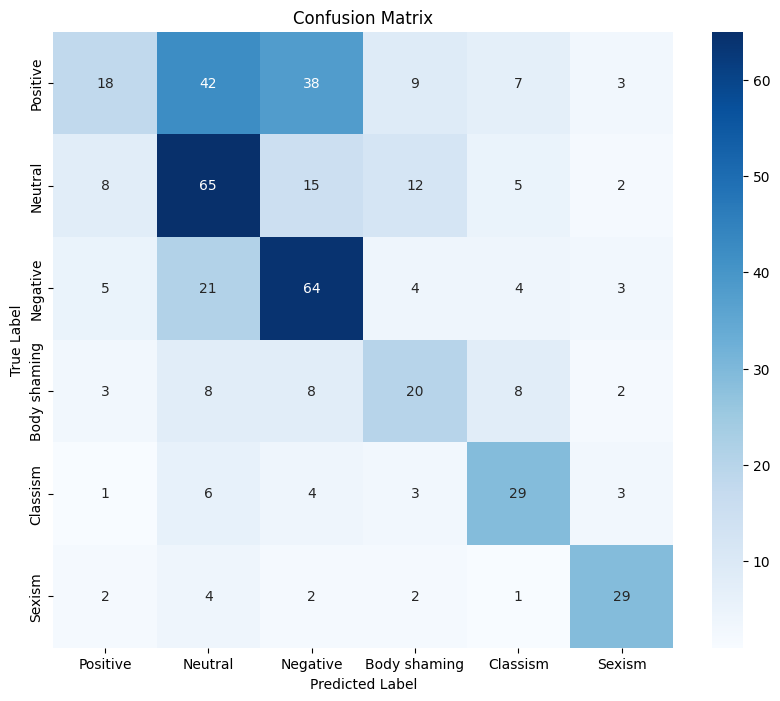

In [ ]:
model.load_state_dict(torch.load('sentiment_model_gru.pt', map_location=device))
model.eval()
_, _, y_true_test, y_pred_test = evaluate(model, test_iter, criterion, encoder)

# Create the confusion matrix using the test data
cm = confusion_matrix(y_true_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')

plt.show()

In [ ]:
print(cm)

[[18 42 38  9  7  3]
 [ 8 65 15 12  5  2]
 [ 5 21 64  4  4  3]
 [ 3  8  8 20  8  2]
 [ 1  6  4  3 29  3]
 [ 2  4  2  2  1 29]]


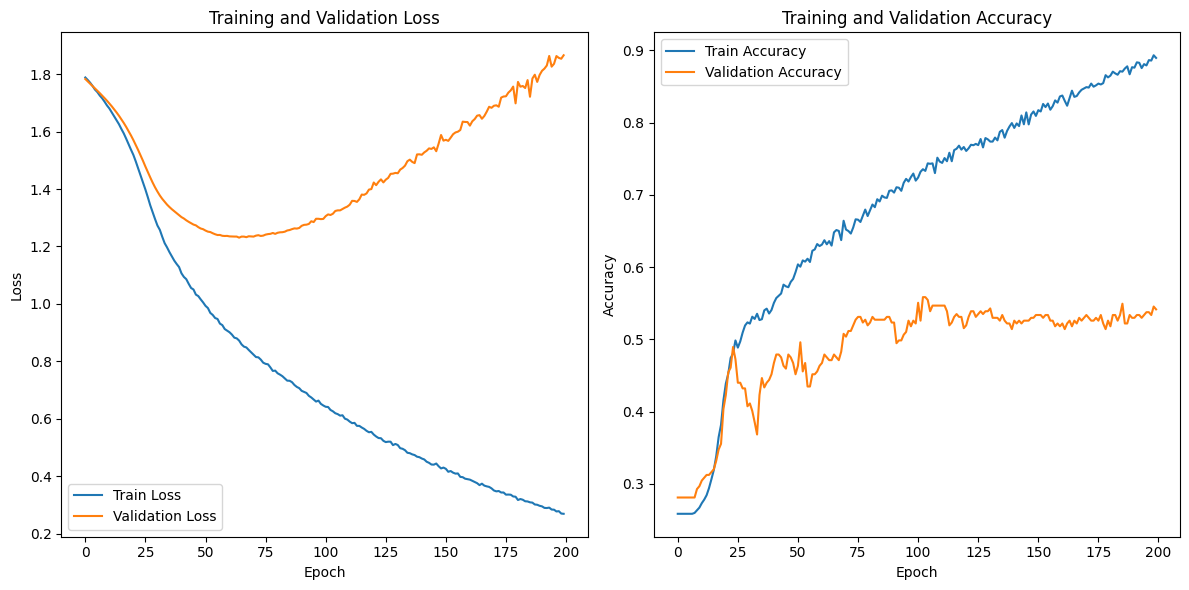

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming `test_iter` is your test data iterator from the training code
# and `model` is your trained model
all_y_true = []
all_y_pred = []

# Iterate over your test data and collect predictions
with torch.no_grad():
    for batch in test_iter:
        predictions = model(batch.cleaned_review)
        y_pred = torch.argmax(predictions, dim=1).cpu().numpy()  # Get predicted labels
        y_true = batch.label.cpu().numpy()  # Get true labels
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

# Define target names (replace with your actual target names)
target_names = ['Positive','Neutral', 'Negative', 'Body shaming', 'Classism', 'Sexism']

# Generate classification report
report = classification_report(all_y_true, all_y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

    Positive       0.49      0.15      0.23       117
     Neutral       0.45      0.61      0.51       107
    Negative       0.49      0.63      0.55       101
Body shaming       0.40      0.41      0.40        49
    Classism       0.54      0.63      0.58        46
      Sexism       0.69      0.72      0.71        40

    accuracy                           0.49       460
   macro avg       0.51      0.53      0.50       460
weighted avg       0.49      0.49      0.46       460



In [ ]:
import torch
import torch.nn as nn
from pythainlp.tokenize import word_tokenize

# Define the GRU model
class GRUSentimentModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super(GRUSentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)  # Output layer
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.gru(embedded)
        hidden = self.dropout(torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1) if self.gru.bidirectional else hidden[-1, :, :])
        output = self.fc(hidden)  # Pass through the output layer
        return output

# Example usage
# ... (Your existing code for tokenization and vocabulary creation) ...

# Create GRU model instance
model = GRUSentimentModel(vocab_size, embedding_dim=128, hidden_dim=256, output_dim=6,  # Adjust output_dim to your number of classes
                         n_layers=2, bidirectional=True, dropout=0.25)

# Example input text
text = "นี่คือประโยคตัวอย่าง"

# Tokenize the text
tokens = word_tokenize(text)
# Convert tokens to numerical IDs using your vocabulary mapping
input_ids = [token_to_id.get(token, unk_token_id) for token in tokens]
input_ids = torch.tensor([input_ids])  # Convert to PyTorch tensor

# Get GRU model output
with torch.no_grad():
    outputs = model(input_ids)

# Print the output shape
print("Output shape:", outputs.shape)

Output shape: torch.Size([1, 6])


In [ ]:
import torch
import torch.nn as nn
from pythainlp.tokenize import word_tokenize

# Define the GRU model - match this to the original model architecture used for training
class SentimentModel(nn.Module): # Change the class name back to SentimentModel
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, padding_id=0):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_id)
        self.gru = nn.GRU(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, batch_first=True, dropout=0 if n_layers < 2 else dropout)
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim) # Use 'out' instead of 'fc'
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.gru(embedded)
        hidden = self.dropout(torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1) if self.gru.bidirectional else hidden[-1, :, :])
        output = self.out(hidden) # Use 'out' instead of 'fc'
        return output

# ... (Your existing code for tokenization and vocabulary creation) ...

# Create the model instance with the correct parameters:
model = SentimentModel(vocab_size, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT) # Use your existing EMBEDDING_DIM, HIDDEN_DIM, etc.

# Load the saved state dictionary:
model.load_state_dict(torch.load('sentiment_model_gru.pt', map_location=device))

# ... (Rest of your code) ...

<All keys matched successfully>

In [ ]:
import torch
import json

class SentimentPredictor:
    def __init__(self, model_path, token2idx_path, idx2lab_path, max_input_len=512, device='cuda'):
        """
        Initializes the SentimentPredictor.

        Args:
            model_path (str): Path to the saved model file.
            token2idx_path (str): Path to the token-to-index mapping file.
            idx2lab_path (str): Path to the index-to-label mapping file.
            max_input_len (int, optional): Maximum input sequence length. Defaults to 512.
            device (str, optional): Device to run the model on ('cuda' or 'cpu'). Defaults to 'cuda'.
        """
        self.model = SentimentModel(vocab_size, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)
        self.model.load_state_dict(torch.load(model_path, map_location=device))
        self.model.eval()
        self.model.to(device)

        with open(token2idx_path, 'r') as f:
            self.token2idx = json.load(f)
        with open(idx2lab_path, 'r') as f:
            self.idx2lab = json.load(f)
        self.max_input_len = max_input_len
        self.device = device

    def predict(self, text):
        """
        Predicts the sentiment of the given text.

        Args:
            text (str): Input text.

        Returns:
            tuple: Predicted class index, predicted class label, and prediction tensor.
        """
        tokens = text.split(" ")
        tokens = tokens[:self.max_input_len - 2]
        ids = self.convert_tokens_to_ids(tokens)
        tensor_input = torch.LongTensor([ids]).to(self.device)

        with torch.no_grad():
            output = self.model(tensor_input)

            # Get the word embeddings
            word_embeddings = self.model.embedding(tensor_input)  # Access the embedding layer

        predicted_class_index = torch.argmax(output).item()
        predicted_class_label = self.idx2lab[str(predicted_class_index)]

        print("\nผลการวิเคราะห์:")
        print("Predicted Class Index:", predicted_class_index)
        print("Predicted Class Label:", predicted_class_label)
        print("\n**Word Embeddings:**")
        print("Shape of embeddings:", word_embeddings.shape)
        print(f"Number of tokens: {len(tokens)}")

        return predicted_class_index, predicted_class_label, output

    def convert_tokens_to_ids(self, tokens):
        """
        Converts tokens to numerical IDs.

        Args:
            tokens (list): List of tokens.

        Returns:
            list: List of numerical IDs.
        """
        out_id = []
        for w in tokens:
            if w in self.token2idx.keys():
                out_id.append(self.token2idx[w])
            else:
                out_id.append(unk_token_id) #unk word
        if len(out_id)==0:
            return [0]
        return out_id

In [ ]:
import json

with open('idx2lab.json', 'r') as f:
    idx2lab = json.load(f)

print(idx2lab)

{'0': 'คำทั่วไป', '1': 'คำทั่วไปทางการชม', '2': 'คำหยาบปกติ', '3': 'เหยียดชนชั้น', '4': 'เหยียดรูปร่าง', '5': 'เหยียดเพศ'}


In [ ]:
# Architecture
OUTPUT_DIM = 6

In [ ]:
predictor = SentimentPredictor(model_path='sentiment_model_gru.pt', token2idx_path='token2idx.json', idx2lab_path='idx2lab.json')

In [ ]:
def analyze_user_input():
    # Get user input
    user_text = input("กรุณาใส่ข้อความที่ต้องการวิเคราะห์ความรู้สึก: ")

    # Make prediction
    # sentiment, tokenized_inputs = predict_sentiment(model, tokenizer, user_text)
    # print("Raw prediction tensor:", sentiment)

    # Get predicted class index
    predicted_class_index = torch.argmax(sentiment).item()
    # predicted_class_index = min(predicted_class_index, len(class_labels) - 1)  # Clamp the index #removed

    # Get predicted class label
    # predicted_class_label = class_labels[predicted_class_index]

    # Display results
    print("\nผลการวิเคราะห์:")
    # print("Predicted Class Index:", predicted_class_index)
    print("Predicted Class Label:", predicted_class_label)

    # Display probability distribution
    print("\nProbability distribution:")
    for i, label in enumerate(class_labels):
        #print(f"{label}: {sentiment[0][i].item():.4f}")
        print(f"{label}: {sentiment[0][i].item():.4f}") # Access elements using correct indexing

    # Get and display word embeddings
    # word_embeddings = get_word_embeddings(model, tokenized_inputs)

    # Print token IDs and their corresponding words
    # input_ids = tokenized_inputs['input_ids'][0]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    print("\n**Word Embeddings:**")
    print("Shape of embeddings:", word_embeddings.shape)
    print(f"Number of tokens: {len(tokens)}")

    # Print tokens and first few dimensions of their embeddings
    for i, token in enumerate(tokens):
        if token in tokenizer.all_special_tokens:
            continue  # Skip special tokens like [CLS], [SEP], etc.

        # Print token and a sample of its embedding (first 5 dimensions)
        embedding_sample = word_embeddings[0, i, :5].tolist()  # First 5 dimensions as example
        print(f"Token: '{token}', Embedding (first 5 dims): {embedding_sample}")

# Run the analysis
if __name__ == "__main__":
    print("==== Thai Sentiment Analysis ====")
    analyze_user_input()

==== Thai Sentiment Analysis ====
กรุณาใส่ข้อความที่ต้องการวิเคราะห์ความรู้สึก: โง่แล้วยังจะมาเรียน

ผลการวิเคราะห์:
Predicted Class Label: คำทั่วไปทางการชม

Probability distribution:
คำทั่วไปทางการชม: -0.3470
คำทั่วไป: 0.8363
คำหยาบปกติ: 0.2527
เหยียดรูปร่าง: -0.3383
เหยียดชนชั้น: -0.0666
เหยียดเพศ: -0.2682


ValueError: only one element tensors can be converted to Python scalars

In [ ]:
max_input_len = 1024  # หรือค่าอื่นๆ ที่เหมาะสม

In [ ]:
# text = "น้องพั้นน่ารัก"
# predicted_class_index, predicted_class_label, prediction_tensor = predictor.predict(text)

text = "้มีอะไรให้ช่วยไหม"
predicted_class_index, predicted_class_label, prediction_tensor = predictor.predict(text)

print("\nผลการวิเคราะห์:")
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", predicted_class_label)
print("Prediction Tensor:", prediction_tensor) # print tensor

# Remove these lines or access them differently
# print("\n**Word Embeddings:**")
# print("Shape of embeddings:", word_embeddings.shape)
# print(f"Number of tokens: {len(tokens)}")



ผลการวิเคราะห์:
Predicted Class Index: 1
Predicted Class Label: คำทั่วไปทางการชม

**Word Embeddings:**
Shape of embeddings: torch.Size([1, 1, 128])
Number of tokens: 1

ผลการวิเคราะห์:
Predicted Class Index: 1
Predicted Class Label: คำทั่วไปทางการชม
Prediction Tensor: tensor([[-0.1685,  0.3947,  0.0587, -0.1297, -0.0046, -0.1164]],
       device='cuda:0')


NameError: name 'self' is not defined